# BiteMe | Exploratory Data Analysis

In this notebook we analyse our images to help inform modelling.

In [1]:
import pandas as pd
import numpy as np
import os
import sys

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn

import cv2
import albumentations as A
import imgaug as ia
import imgaug.augmenters as iaa

sys.path.append("..")
from helpers import read_images, display_img

In [2]:
# Define directories
base_dir_path = "../"

data_dir_path = os.path.join(base_dir_path, "data")
data_clean_dir_path = os.path.join(data_dir_path, "cleaned")

data_dir = os.listdir(data_dir_path)
data_clean_dir = os.listdir(data_clean_dir_path)

metadata_path = os.path.join(data_clean_dir_path, "metadata.csv")
metadata = pd.read_csv(metadata_path)

metadata.head()

img_name  \
0  7059b14d2aa03ed6c4de11afa32591995181d31c.jpg   
1  ea1b100b581fcdb7ddfae52cc62347a99e304ba4.jpg   
2  1a1442990ff143b7560e5757d9f76d37ab007f48.jpg   
3  6eac051b9c45ff6821ec8675216f371711b7cea9.jpg   
4  fc72767f8520df9b2b83941077dc0ee013eb9399.jpg   

                                            img_path label  
0  ../data/cleaned/none/7059b14d2aa03ed6c4de11afa...  none  
1  ../data/cleaned/none/ea1b100b581fcdb7ddfae52cc...  none  
2  ../data/cleaned/none/1a1442990ff143b7560e5757d...  none  
3  ../data/cleaned/none/6eac051b9c45ff6821ec86752...  none  
4  ../data/cleaned/none/fc72767f8520df9b2b8394107...  none

In [3]:
metadata.value_counts("label")

label
tick        29
none        28
mosquito    28
horsefly    28
bedbug      28
ant         26
bee         25
mite        23
dtype: int64

In [4]:
print(f"Number of images: {len(metadata)}")

Number of images: 215


In [5]:
# Set image default dimensions
ROWS = 512
COLS = 512
CHANNELS = 3

SEED = 14

np.random.seed(SEED)
ia.seed(SEED)

In [6]:
img_array = read_images(
    data_dir_path=data_clean_dir_path, 
    rows=ROWS, 
    cols=COLS, 
    channels=CHANNELS, 
    write_images=False, 
    output_data_dir_path=None
)
print(f"Image array shape: {img_array.shape}")

Reading images from: ../data/cleaned
Rows set to 512
Columns set to 512
Channels set to 3
Writing images is set to: False
Reading images...


100%|██████████| 26/26 [00:01<00:00, 24.75it/s]


Image reading complete.
Image array shape: (215, 512, 512, 3)
Image array shape: (215, 512, 512, 3)


## Example Augmentations

In [7]:
# Get example image
example_img = np.expand_dims(img_array[65], axis=0)

Example images


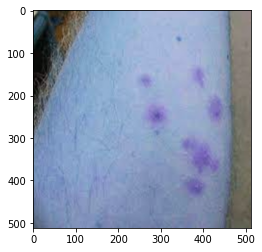

In [8]:
print("Example images")
for img in example_img:
    display_img(img)

### Flip left to right

In [9]:
def display_img_aug(img, aug, *args, **kwargs):
    """
    Displays input image alongside augmented image.
    
    Parameters
    ----------
    img : np.array
        Original image to augment.
    aug : function
        imgaug.augmenters function to augment img with.
    
    Returns
    -------
    plt.figure
    """
    
    seq = iaa.Sequential([
        aug(*args, **kwargs)
    ])
    img_aug = seq(images=img)
    images_aug = np.concatenate([img, img_aug])
    
    for img in images_aug:
        display_img(img)

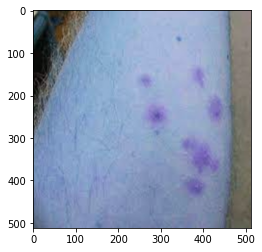

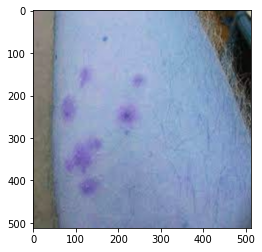

In [10]:
display_img_aug(example_img, iaa.Fliplr, p=1)

### Flip up to down

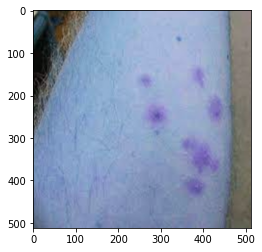

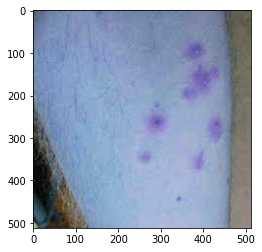

In [11]:
display_img_aug(example_img, iaa.Flipud, p=1)

### Gaussian Blur

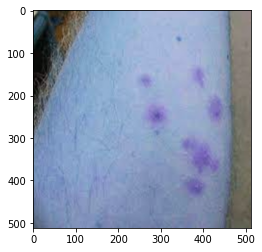

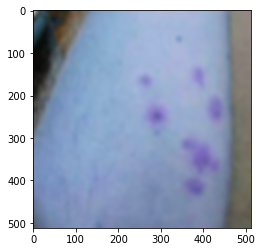

In [12]:
display_img_aug(example_img, iaa.GaussianBlur, sigma=6.0)

### Average Blur

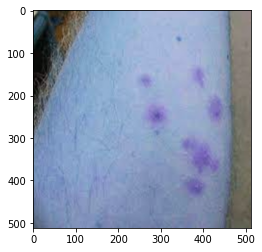

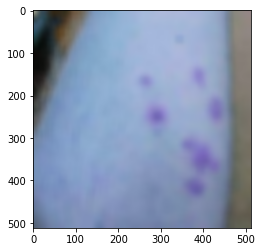

In [13]:
display_img_aug(example_img, iaa.AverageBlur, k=20)

### MotionBlur

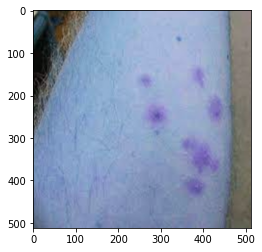

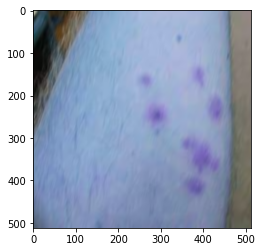

In [14]:
display_img_aug(example_img, iaa.MotionBlur, k=15)

### MultiplyBrightness

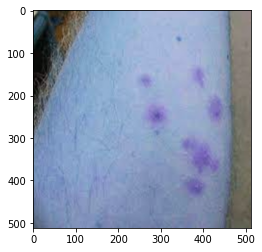

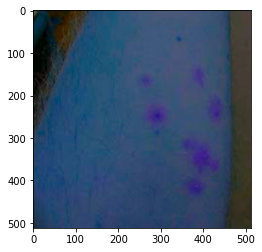

In [15]:
display_img_aug(example_img, iaa.MultiplyBrightness, 0.5)

### MultiplyHue

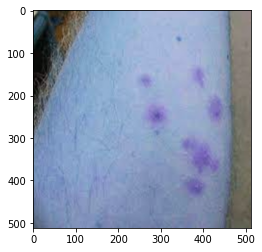

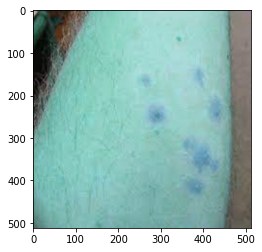

In [16]:
display_img_aug(example_img, iaa.MultiplyHue, 0.8)

### MultiplySaturation

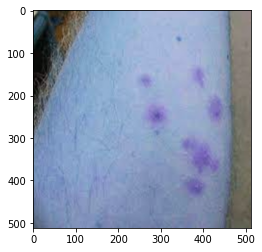

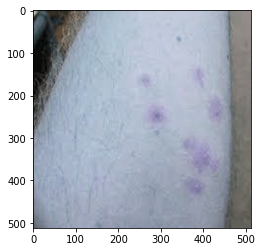

In [17]:
display_img_aug(example_img, iaa.MultiplySaturation, 0.5)

### Grayscale

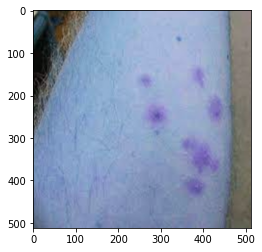

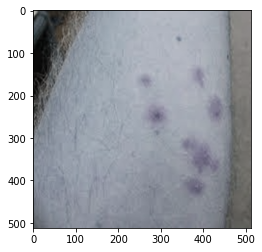

In [18]:
display_img_aug(example_img, iaa.Grayscale, 0.7)

### GammaContrast

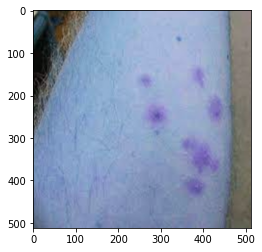

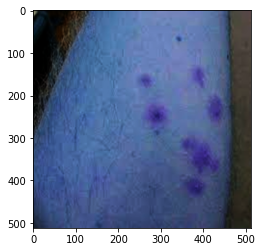

In [19]:
display_img_aug(example_img, iaa.GammaContrast, 2)

### SigmoidContrast

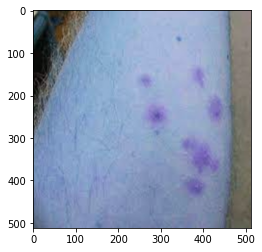

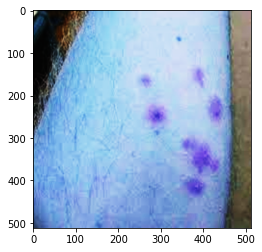

In [20]:
display_img_aug(example_img, iaa.SigmoidContrast, 9)

### LinearContrast

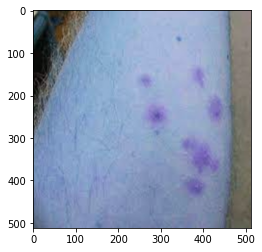

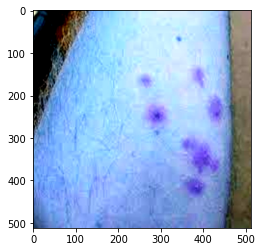

In [21]:
display_img_aug(example_img, iaa.LinearContrast, 2)

### Affine

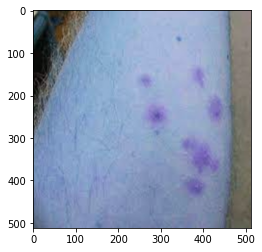

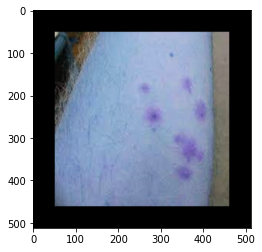

In [22]:
display_img_aug(example_img, iaa.Affine, 0.8)

### ScaleX

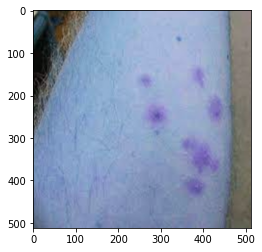

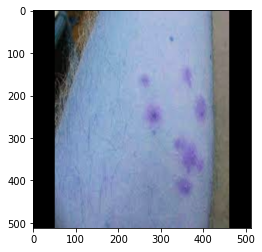

In [23]:
display_img_aug(example_img, iaa.ScaleX, 0.8)

### ScaleY

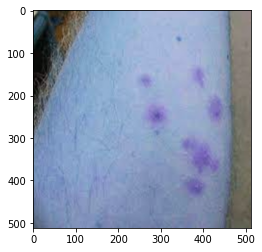

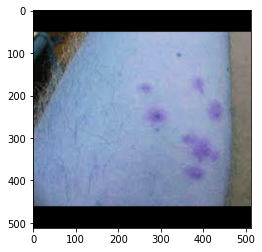

In [24]:
display_img_aug(example_img, iaa.ScaleY, 0.8)

### TranslateX

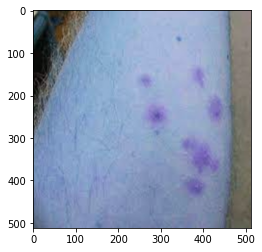

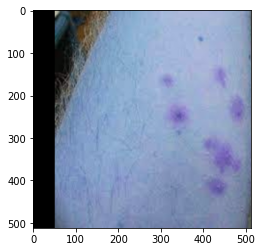

In [25]:
display_img_aug(example_img, iaa.TranslateX, 0.1)

### TranslateY

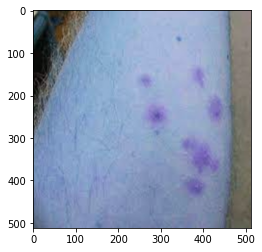

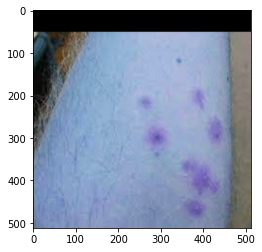

In [26]:
display_img_aug(example_img, iaa.TranslateY, 0.1)

### Rotate

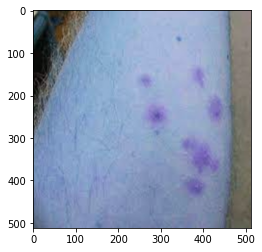

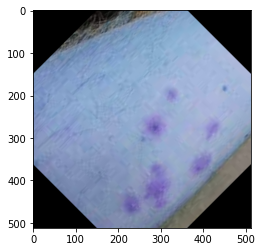

In [27]:
display_img_aug(example_img, iaa.Rotate, 45)

### ShearX

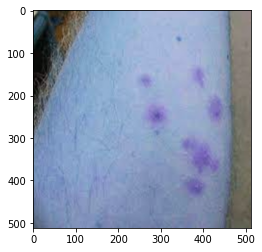

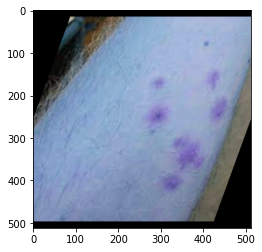

In [28]:
display_img_aug(example_img, iaa.ShearX, 20)

### ShearY

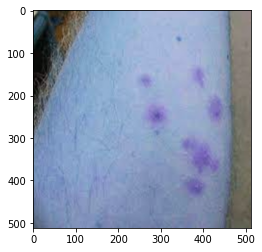

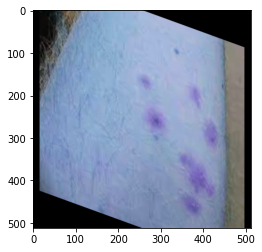

In [29]:
display_img_aug(example_img, iaa.ShearY, 20)

### GaussianNoise

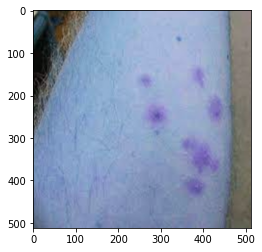

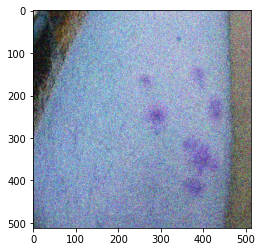

In [33]:
display_img_aug(example_img, iaa.imgcorruptlike.GaussianNoise, severity=3)

### ShotNoise

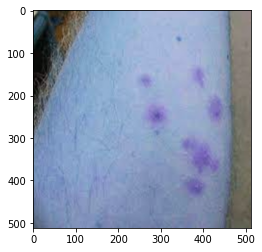

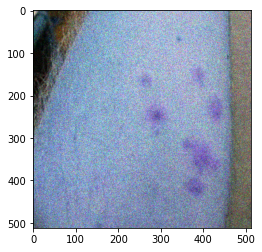

In [34]:
display_img_aug(example_img, iaa.imgcorruptlike.ShotNoise, severity=2)

### ImpulseNoise

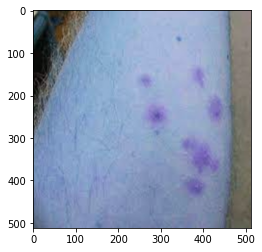

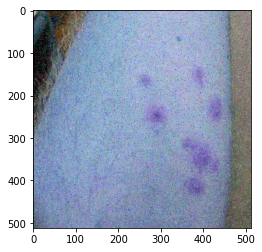

In [35]:
display_img_aug(example_img, iaa.imgcorruptlike.ImpulseNoise, severity=2)

### SpeckleNoise

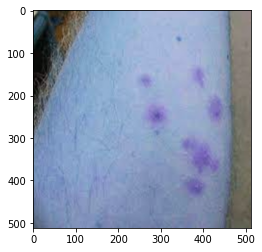

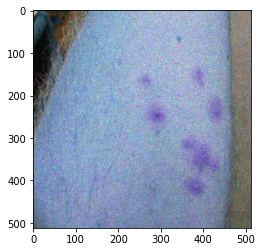

In [36]:
display_img_aug(example_img, iaa.imgcorruptlike.SpeckleNoise, severity=2)

### DefocusBlur

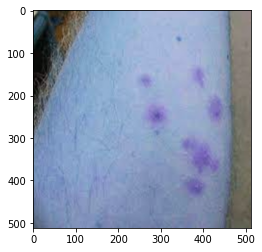

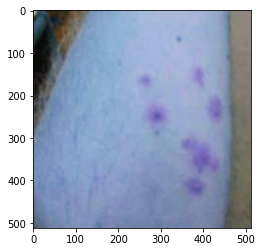

In [38]:
display_img_aug(example_img, iaa.imgcorruptlike.DefocusBlur, severity=2)

### ZoomBlur

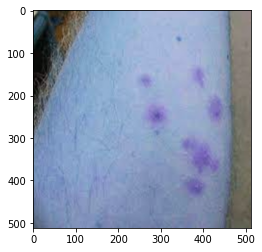

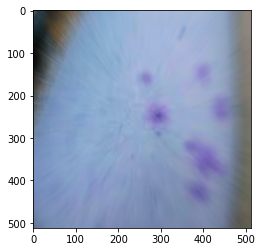

In [39]:
display_img_aug(example_img, iaa.imgcorruptlike.ZoomBlur, severity=2)

### Contrast

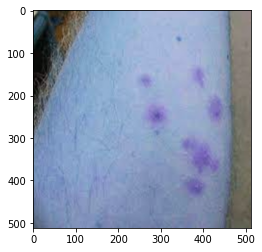

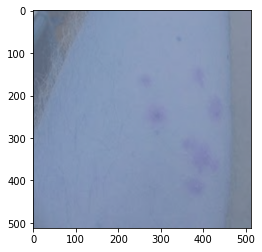

In [40]:
display_img_aug(example_img, iaa.imgcorruptlike.Contrast, severity=2)

### Brightness

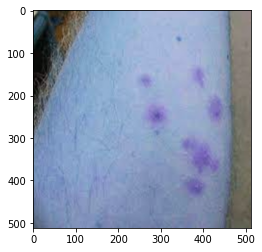

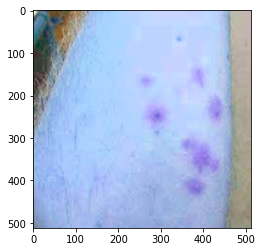

In [41]:
display_img_aug(example_img, iaa.imgcorruptlike.Brightness, severity=2)

### Saturate

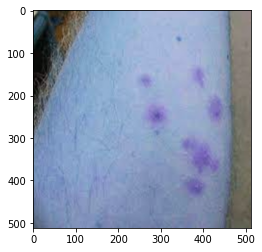

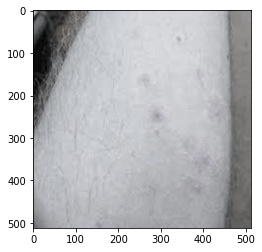

In [42]:
display_img_aug(example_img, iaa.imgcorruptlike.Saturate, severity=2)

### Solarize

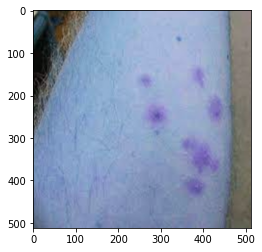

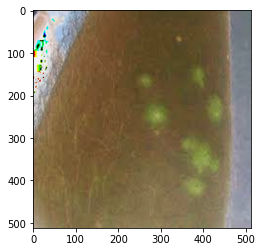

In [44]:
display_img_aug(example_img, iaa.Solarize, threshold=10)

### EnhanceColor

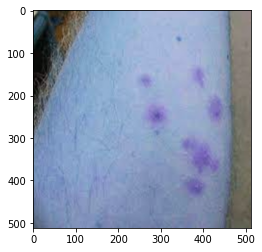

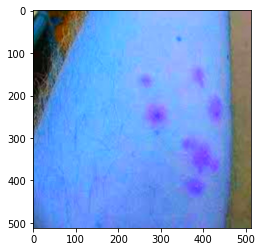

In [48]:
display_img_aug(example_img, iaa.pillike.EnhanceColor)

### EnhanceContrast

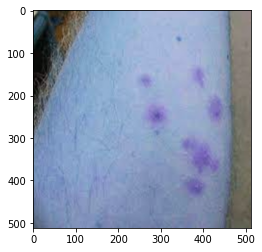

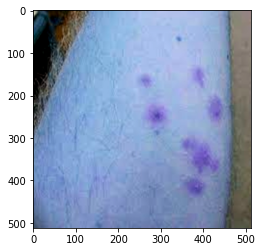

In [49]:
display_img_aug(example_img, iaa.pillike.EnhanceContrast)

### EnhanceBrightness

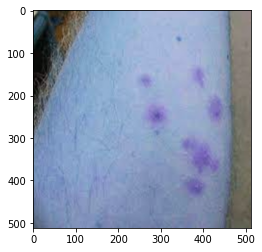

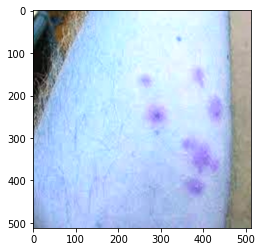

In [50]:
display_img_aug(example_img, iaa.pillike.EnhanceBrightness)

### EnhanceSharpness

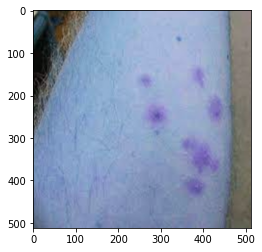

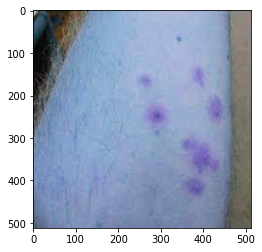

In [51]:
display_img_aug(example_img, iaa.pillike.EnhanceSharpness)

### AdditiveGaussianNoise

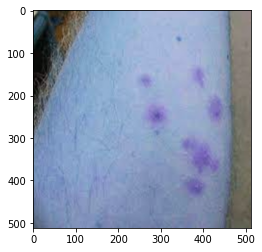

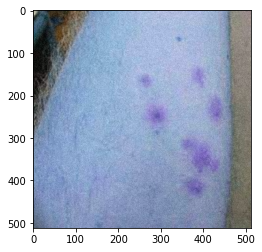

In [56]:
display_img_aug(example_img, iaa.AdditiveGaussianNoise, 5)

### AdditiveLaplaceNoise

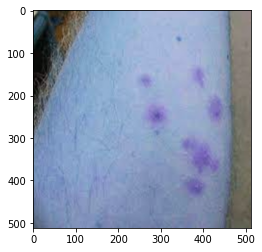

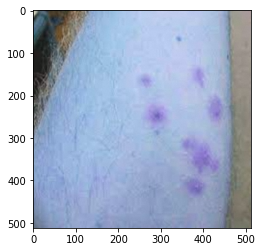

In [60]:
display_img_aug(example_img, iaa.AdditiveLaplaceNoise, 20)

### AdditivePoissonNoise

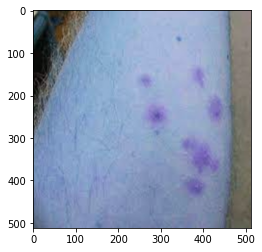

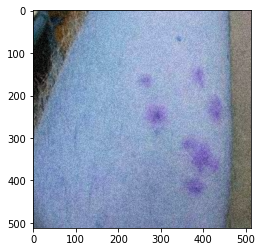

In [59]:
display_img_aug(example_img, iaa.AdditivePoissonNoise, 20)

### Cutout

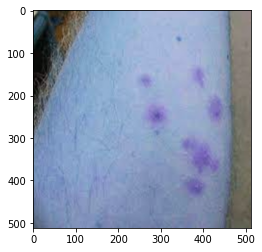

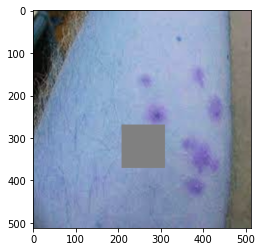

In [64]:
display_img_aug(example_img, iaa.Cutout)

### Dropout

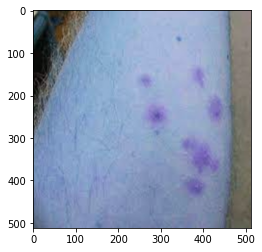

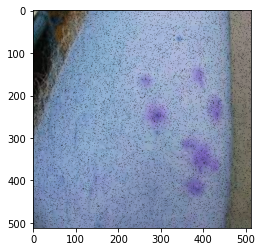

In [65]:
display_img_aug(example_img, iaa.Dropout)

### CoarseDropout

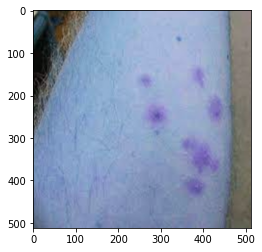

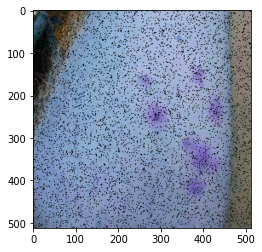

In [68]:
display_img_aug(example_img, iaa.CoarseDropout, size_percent=0.5)


### ImpulseNoise

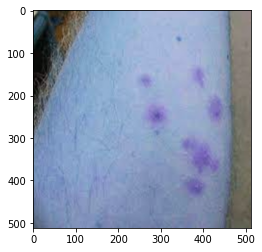

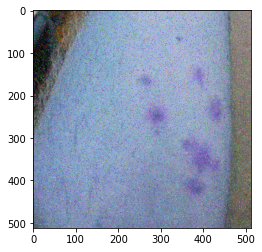

In [70]:
display_img_aug(example_img, iaa.ImpulseNoise, 0.1)

### SaltAndPepper

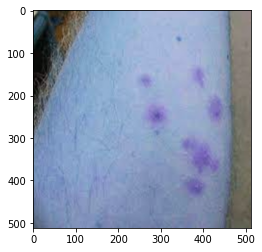

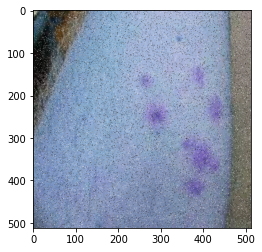

In [71]:
display_img_aug(example_img, iaa.SaltAndPepper, 0.1)